In [119]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [120]:
from scipy import stats

In [121]:
#EJEMPLO 1: Distribución Beta.

def GenerarBeta(a,b,N):
    X0=np.random.uniform()
    Simuladas=[X0]
    for i in range(0,N-1):
        Y=np.random.uniform()
        rho=((Y**(a-1))*((1-Y)**(b-1)))/((Simuladas[i]**(a-1))*( (1-Simuladas[i])**(b-1)))
        alfa=min( rho   ,1 )
        U=np.random.uniform()
        if U<=alfa: 
            Simuladas.append(Y)
        else: 
            Simuladas.append(Simuladas[i])
    return(Simuladas)

In [122]:
a=2.7
b=6.3
N=1500
Sim=GenerarBeta(2.7,6.3,10000)

Sim2=stats.beta.rvs(a,b,size=1500)

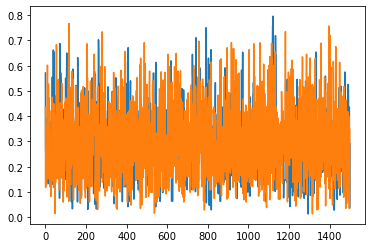

In [123]:
plt.plot(Sim[:1500])
plt.plot(Sim2)
plt.show()

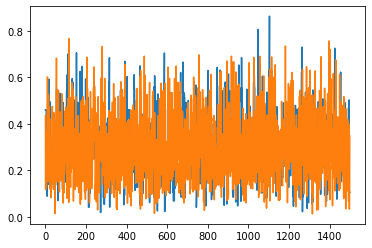

In [124]:
plt.plot(Sim[8500:])
plt.plot(Sim2)
plt.show()

In [125]:
scipy.stats.kstest(Sim[:1500],Sim2)

KstestResult(statistic=0.037333333333333336, pvalue=0.24679714612438308)

In [126]:
scipy.stats.kstest(Sim[8500:],Sim2)

KstestResult(statistic=0.027333333333333334, pvalue=0.6297701956111512)

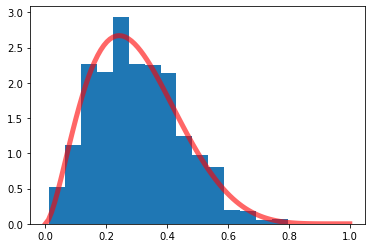

In [127]:
plt.hist(Sim[:1500],bins=15,density=True)
x = np.linspace(0.001,
                0.999, 100)
plt.plot(x, stats.beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

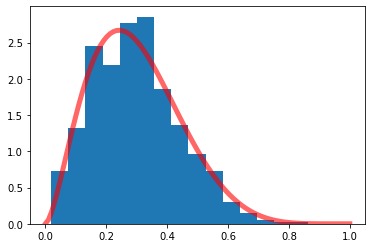

In [128]:
plt.hist(Sim[8500:],bins=15,density=True)
x = np.linspace(0.001,
                0.999, 100)
plt.plot(x, stats.beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

# EJEMPLO 2

In [146]:
#EJEMPLO 2: Cauchy

def GenerarCauchy1(a,b,N):
    X0=np.random.uniform()
    Simuladas=[X0]
    for i in range(0,N-1):
        Y=np.random.normal()
        rho=(stats.cauchy.pdf(Y,a,b)*stats.norm.pdf(Simuladas[i]))/(stats.cauchy.pdf(Simuladas[i],a,b)*stats.norm.pdf(Y))
        alfa=min( rho   ,1 )
        U=np.random.uniform()
        if U<=alfa: 
            Simuladas.append(Y)
        else: 
            Simuladas.append(Simuladas[i])
    return(Simuladas)

In [222]:
def GenerarCauchy2(a,b,N,A=1):
    X0=np.random.uniform()
    Simuladas=[X0]
    for i in range(0,N-1):
        Z=np.random.normal()
        rho=(stats.cauchy.pdf(Simuladas[i]+(A*Z),a,b))/(stats.cauchy.pdf(Simuladas[i],a,b))
        alfa=min( rho   ,1 )
        U=np.random.uniform()
        if U<=alfa: 
            Simuladas.append(Simuladas[i]+(A*Z))
        else: 
            Simuladas.append(Simuladas[i])
    return(Simuladas)

In [214]:
SimC=GenerarCauchy1(1,1,50000)

In [233]:
SimC2=GenerarCauchy2(1,1,50000,A=1.2)

In [216]:
SimC3=stats.cauchy.rvs(1,1,size=1500)

In [229]:
scipy.stats.kstest(SimC[:1500],SimC3)

KstestResult(statistic=0.12533333333333332, pvalue=1.1075678890997838e-10)

In [230]:
scipy.stats.kstest(SimC[48500:],SimC3)

KstestResult(statistic=0.10733333333333334, pvalue=6.083739837460075e-08)

In [234]:
scipy.stats.kstest(SimC2[:1500],SimC3)

KstestResult(statistic=0.114, pvalue=6.596288260272376e-09)

In [235]:
scipy.stats.kstest(SimC2[48500:],SimC3)

KstestResult(statistic=0.076, pvalue=0.0003435022259959776)

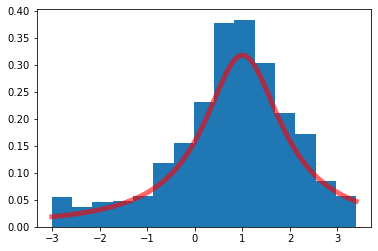

In [236]:
plt.hist(SimC[:1500],bins=15,density=True)
x = np.linspace(min(SimC[:1500]),
                max(SimC[:1500]), 100)
plt.plot(x, stats.cauchy.pdf(x, 1, 1),
       'r-', lw=5, alpha=0.6, label='cauchy pdf')
plt.show()

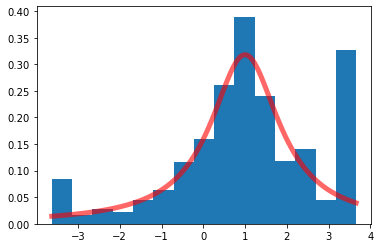

In [237]:
plt.hist(SimC[48500:],bins=15,density=True)
x = np.linspace(min(SimC[48500:]),
                max(SimC[48500:]), 100)
plt.plot(x, stats.cauchy.pdf(x, 1, 1),
       'r-', lw=5, alpha=0.6, label='cauchy pdf')
plt.show()

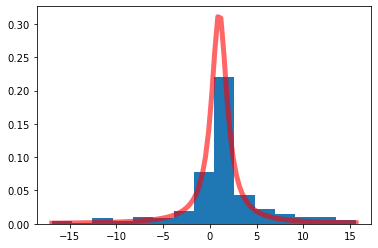

In [238]:
plt.hist(SimC2[:1500],bins=15,density=True)
x = np.linspace(min(SimC2[:1500]),
                max(SimC2[:1500]), 100)
plt.plot(x, stats.cauchy.pdf(x, 1, 1),
       'r-', lw=5, alpha=0.6, label='cauchy pdf')
plt.show()

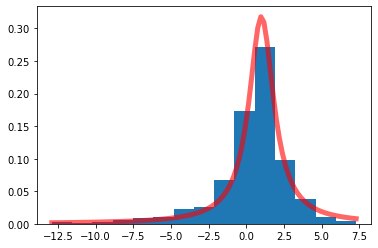

In [239]:
plt.hist(SimC2[48500:],bins=15,density=True)
x = np.linspace(min(SimC2[48500:]),
                max(SimC2[48500:]), 100)
plt.plot(x, stats.cauchy.pdf(x, 1, 1),
       'r-', lw=5, alpha=0.6, label='cauchy pdf')
plt.show()